In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import sys
import re

strChromSizes_ambMex = '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/data/ambMex/chromSizes.txt'
strChromSizes_lepOcu = '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/data/lepOcu/chromSizes.txt'
strCmpData = '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/ambMex_lepOcu.mutual.chr.list'

chrSizes_ambMex = {'order': [], 'chromosomes': dict()}
print(f"Reading chrom size data from '{strChromSizes_ambMex}'", file=sys.stderr)
with(open(strChromSizes_ambMex, 'r')) as hFile:
    for line in hFile.readlines():
        chrName, chrLen = line.strip().split('\t')
        chrSizes_ambMex['chromosomes'][chrName] = int(chrLen)
        chrSizes_ambMex['order'].append(chrName)

chrSizes_lepOcu = {'order': [], 'chromosomes': dict()}
print(f"Reading chrom size data from '{strChromSizes_lepOcu}'", file=sys.stderr)
with(open(strChromSizes_lepOcu, 'r')) as hFile:
    for line in hFile.readlines():
        chrName, chrLen = line.strip().split('\t')
        chrSizes_lepOcu['chromosomes'][chrName] = int(chrLen)
        chrSizes_lepOcu['order'].append(chrName)

Reading chrom size data from '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/data/ambMex/chromSizes.txt'
Reading chrom size data from '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/data/lepOcu/chromSizes.txt'


In [2]:
def calculateOffset(strChr, chrSizes):
    iOffset = 0
    for x in chrSizes['order']:
        if x == strChr:
            return iOffset
        else:
            iOffset += chrSizes['chromosomes'][x]
    print(f'ERROR: {strChr} not found in {chrSizes}')
            
    
x_data = []
y_data = []
print(f"Reading the mutual best hits from '{strCmpData}'", file=sys.stderr)
with(open(strCmpData, 'r')) as hFile:
    for line in hFile.readlines():
        m = re.search('^([^\t\s]+)\t([^:]+):([0-9]+)-([0-9]+)\t([^\t\s]+)\t([^:]+):([0-9]+)-([0-9]+)', line)
        if m:
            chr_x = m.group(2)
            start_x = int(m.group(3))
            end_x = int(m.group(4))
            x_data.append( start_x + calculateOffset(chr_x, chrSizes_ambMex) )
            chr_y = m.group(6)
            start_y = int(m.group(7))
            end_y = int(m.group(8))
            y_data.append( start_y + calculateOffset(chr_y, chrSizes_lepOcu) )
        else:
            print(f'Malformed line: {line}')

Reading the mutual best hits from '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/ambMex_lepOcu.mutual.chr.list'


Text(0, 0.5, 'gar (Lepisosteus oculatus)')

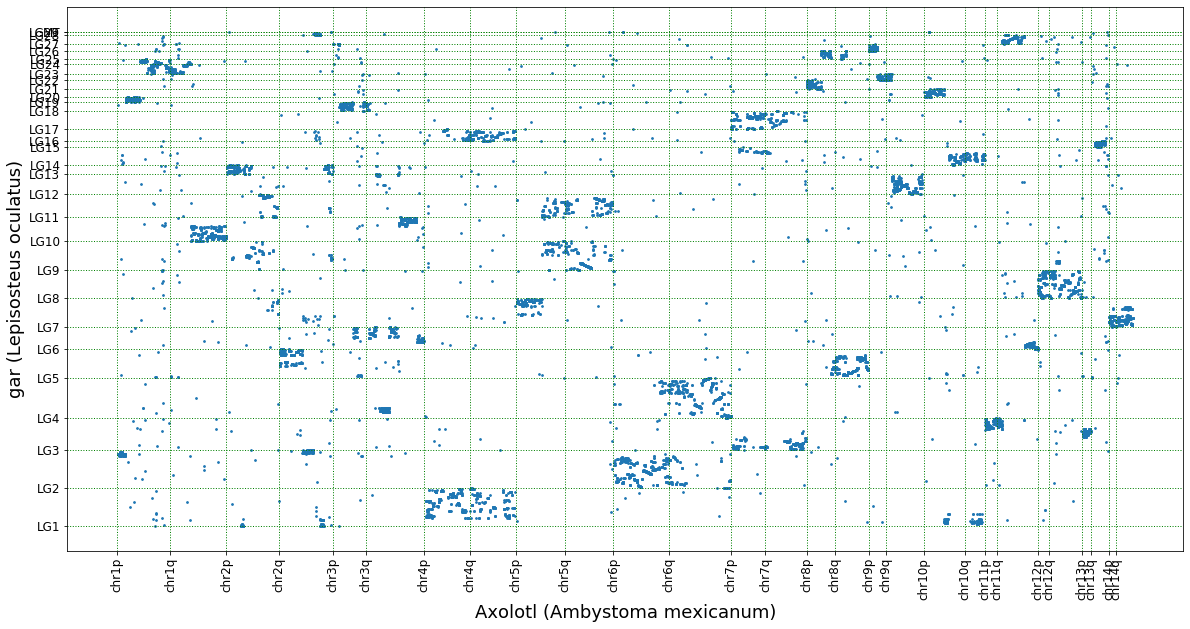

In [5]:
fig = plt.figure(figsize=(20,10))
plt.scatter(x_data, y_data, s=3)
x_ticks = []
x_ticks_labels = []
for x in chrSizes_ambMex['order']:
    iOffset = calculateOffset(x, chrSizes_ambMex)
    plt.axvline(iOffset, linestyle='dotted', color='green', linewidth=1)
    x_ticks.append(iOffset)
    x_ticks_labels.append(x)
plt.xticks(x_ticks, x_ticks_labels, rotation=90, fontsize=12)
plt.xlabel('Axolotl (Ambystoma mexicanum)', fontsize=18)
    
y_ticks = []
y_ticks_labels = []
for y in chrSizes_lepOcu['order']:
    iOffset = calculateOffset(y, chrSizes_lepOcu)
    plt.axhline(iOffset, linestyle='dotted', color='green', linewidth=1)
    y_ticks.append(iOffset)
    y_ticks_labels.append(y)
plt.yticks(y_ticks, y_ticks_labels, fontsize=12)
plt.ylabel('gar (Lepisosteus oculatus)', fontsize=18)